# Compute the Graph Fourier Transform of a graph signal

In [4]:
import scipy
import scipy.io as spio


def loadmat(filename):
    '''
    this function should be called instead of direct spio.loadmat
    as it cures the problem of not properly recovering python dictionaries
    from mat files. It calls the function check keys to cure all entries
    which are still mat-objects
    '''
    def _check_keys(d):
        '''
        checks if entries in dictionary are mat-objects. If yes
        todict is called to change them to nested dictionaries
        '''
        for key in d:
            if isinstance(d[key], spio.matlab.mio5_params.mat_struct):
                d[key] = _todict(d[key])
        return d

    def _todict(matobj):
        '''
        A recursive function which constructs from matobjects nested dictionaries
        '''
        d = {}
        for strg in matobj._fieldnames:
            elem = matobj.__dict__[strg]
            if isinstance(elem, spio.matlab.mio5_params.mat_struct):
                d[strg] = _todict(elem)
            elif isinstance(elem, np.ndarray):
                d[strg] = _tolist(elem)
            else:
                d[strg] = elem
        return d

    def _tolist(ndarray):
        '''
        A recursive function which constructs lists from cellarrays
        (which are loaded as numpy ndarrays), recursing into the elements
        if they contain matobjects.
        '''
        elem_list = []
        for sub_elem in ndarray:
            if isinstance(sub_elem, spio.matlab.mio5_params.mat_struct):
                elem_list.append(_todict(sub_elem))
            elif isinstance(sub_elem, np.ndarray):
                elem_list.append(_tolist(sub_elem))
            else:
                elem_list.append(sub_elem)
        return elem_list
    data = scipy.io.loadmat(filename, struct_as_record=False, squeeze_me=True)
    return _check_keys(data)

In [2]:
import numpy as np

In [58]:
def compute_gft(shift_matrix, graph_signal):
    eigenvalues, eigenvectors = np.linalg.eig(shift_matrix)
    idx = eigenvalues.argsort()[::-1]
    sorted_eigenvalues = eigenvalues[idx]
    sorted_eigenvectors = eigenvectors[:, idx]
    return np.dot(eigenvectors.T.conj(), graph_signal)

In [59]:
graph_signal = loadmat('graph_sp_data.mat')

In [60]:
A = graph_signal['A']
D = np.zeros((50,50))
for i in range(50):
    D[i][i] = np.sum(A[i,:])

# Form Laplacian matrix
L = D-A

In [71]:
graph_freq_signal = compute_gft(L, graph_signal['x1'])

In [72]:
import matplotlib.pyplot as plt

<StemContainer object of 3 artists>

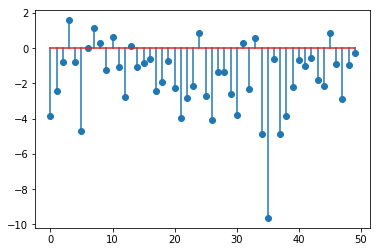

In [73]:
plt.stem(graph_signal['x1'])

<StemContainer object of 3 artists>

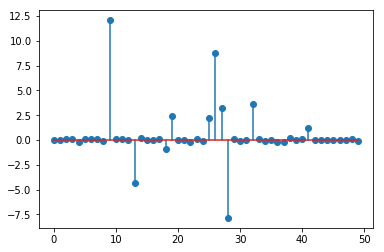

In [74]:
plt.stem(graph_freq_signal)

In [75]:
graph_freq_signal = compute_gft(L, graph_signal['x2'])

<StemContainer object of 3 artists>

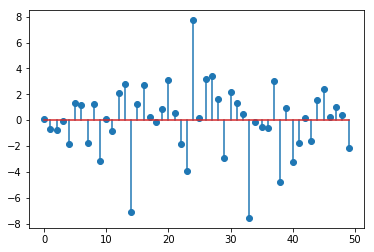

In [77]:
plt.stem(graph_signal['x2'])

<StemContainer object of 3 artists>

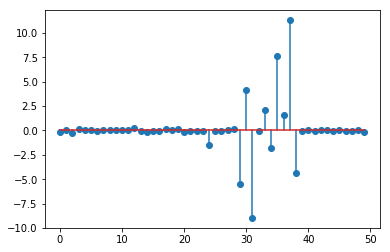

In [78]:
plt.stem(graph_freq_signal)

In [79]:
graph_freq_signal = compute_gft(L, graph_signal['x3'])

<StemContainer object of 3 artists>

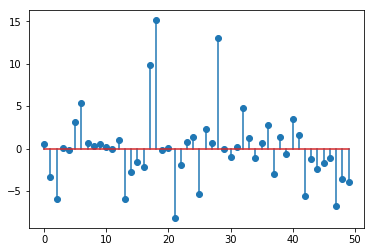

In [80]:
plt.stem(graph_signal['x3'])

<StemContainer object of 3 artists>

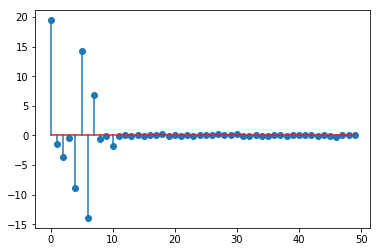

In [81]:
plt.stem(graph_freq_signal)

In [87]:
def compute_graph_tv(graph_signal, L):
    return np.dot(graph_signal.T, np.dot(L,graph_signal))

In [93]:
TV3 = compute_graph_tv(graph_signal['x3'], L)

In [89]:
TV1

241.79931345028308

In [92]:
TV2

1385.6108003441216

In [94]:
TV3

8761.276848746915